In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set seed
np.random.seed(42)
#Daftar jenis sayuran
vegetables_types = ['Carrot', 'Broccoli', 'Spinach', 'Tomato', 'Cucumber']
#jumlah data
n= 1000
#Generate DataFrame
data_vegetables = pd.DataFrame({
    'vegetables_types': np.random.choice(vegetables_types, size=n),
    'weight': np.random.normal(200,70, size=n), # gram
    'color_intensity': np.random.uniform(0, 1, size=n),  # nilai 0-1 representasi warna
    'lenght': np.random.normal(15, 5, size=n), #cm
    'bitterness': np.random.randint(1, 11, size=n), #skala 1-10
    'crispness': np.random.randint(1, 11, size=n), #skala 1-10 kerenyahan
    'freshness': np.random.randint(1, 6, size=n), #skala 1-5 kesegaran
    'fiber_content': np.random.uniform(1.0, 5.0, size=n),  # gram serat per 100g
    'is_organic': np.random.choice(['yes', 'no'], size=n),
    'harvest_season': np.random.choice(['Spring', 'Summer', 'Autum', 'Winter'], size=n)
})
data_vegetables.head()

,vegetables_types,weight,color_intensity,lenght,bitterness,crispness,freshness,fiber_content,is_organic,harvest_season
0,Tomato,207.657636,0.105474,13.853046,10,1,2,1.978162,no,Spring
1,Cucumber,250.803664,0.656780,14.782615,4,8,1,1.909288,yes,Summer
2,Spinach,233.670646,0.822103,7.344462,2,2,5,2.356949,yes,Autum
3,Cucumber,215.671882,0.380420,17.571274,4,5,5,2.992795,yes,Summer
4,Cucumber,144.666788,0.775612,17.860287,1,9,1,2.754671,yes,Winter


Statistik Deskriptif Sayuran:
            weight  color_intensity       lenght   bitterness   crispness  \
count  1000.000000      1000.000000  1000.000000  1000.000000  1000.00000   
mean    204.863986         0.502604    15.031507     5.564000     5.53700   
std      70.298691         0.289411     5.055880     2.915545     2.89396   
min      -4.494534         0.000012     0.044320     1.000000     1.00000   
25%     157.605173         0.271331    11.503490     3.000000     3.00000   
50%     203.933119         0.503940    14.993206     6.000000     5.00000   
75%     249.596279         0.753561    18.398485     8.000000     8.00000   
max     423.517530         0.997821    34.631189    10.000000    10.00000   

         freshness  fiber_content  
count  1000.000000    1000.000000  
mean      2.949000       3.038412  
std       1.402272       1.160103  
min       1.000000       1.011647  
25%       2.000000       2.059917  
50%       3.000000       3.071836  
75%       4.000000      

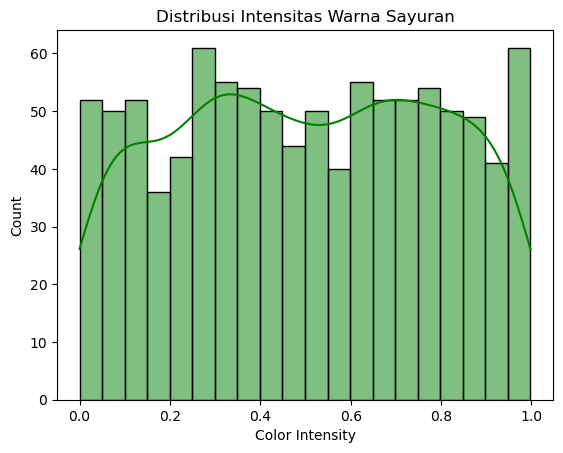

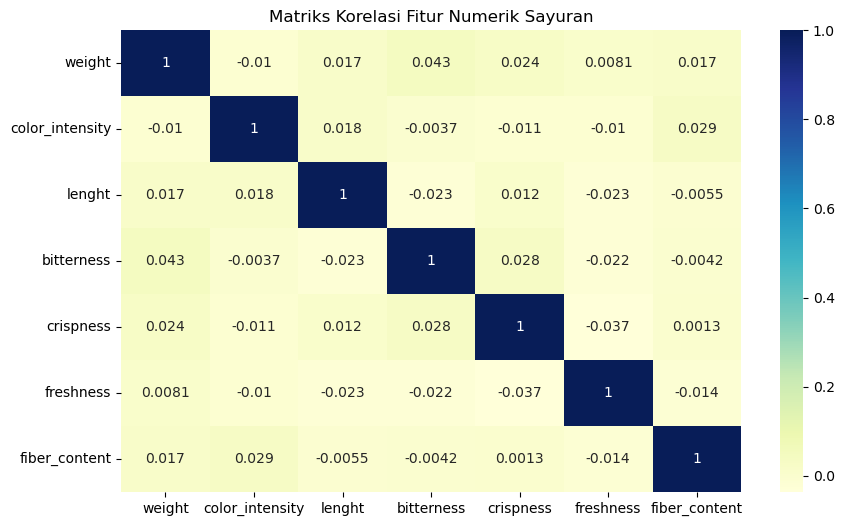

In [5]:
# Statistik numerik
print("Statistik Deskriptif Sayuran:")
print(data_vegetables.describe())

# Distribusi kategori sayuran
print("\nDistribusi Jenis Sayuran:")
print(data_vegetables['vegetables_types'].value_counts())

# Visualisasi distribusi warna (color_intensity)
sns.histplot(data_vegetables['color_intensity'], bins=20, kde=True, color='green')
plt.title("Distribusi Intensitas Warna Sayuran")
plt.xlabel("Color Intensity")
plt.show()

# Korelasi antar fitur numerik
plt.figure(figsize=(10,6))
sns.heatmap(data_vegetables.select_dtypes(include='number').corr(), annot=True, cmap='YlGnBu')
plt.title("Matriks Korelasi Fitur Numerik Sayuran")
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in ['vegetables_types', 'is_organic', 'harvest_season']:
    le = LabelEncoder()
    data_vegetables[col] = le.fit_transform(data_vegetables[col])
    label_encoders[col] = le

# Simpan dataset sayuran ke CSV
data_vegetables.to_csv('dataset_sayuran.csv',index=False)